<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/filtro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import sys
import h5py #librerua para crear archivos , h5py

In [ ]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import unzipmodule
import graficador

In [10]:
def design_and_apply_filter(sample_frecuencie):
    fnqy=sample_frecuencie/2
    # Get user's choice of filter
    print("Choose a filter:")
    print("1. Low-Pass Filter")
    print("2. Bandpass Filter")
    choice = int(input("Enter 1 or 2: "))

    if choice == 1: #filtro pasabajo

        Wn = float(input("Enter the cutoff frequency for the low-pass filter: "))
        Wn=Wn/fnqy
        N= float(input("Enter the filter's order: "))
        b, a = signal.butter(N, Wn, 'low', True) #coeficientes de la funcion de transferencia
        w, h = signal.freqs(b, a)

        ##########33 grafico del filtro
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.plot(w*fnqy, 20 * np.log10(abs(h)))
        plt.title('Butterworth lowpass filter')
        plt.xlabel('Frequency [Hz ]')
        plt.ylabel('Amplitude [dB]')
        plt.grid(True)
        plt.axis([1,np.max(w)*fnqy, -60, 3])

        # Plot the phase response
        plt.subplot(2, 1, 2)
        angles=np.unwrap(np.angle(h))
        plt.plot(w*fnqy,angles)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Phase (radians)')
        plt.grid(True)
        plt.axis([1,np.max(w)*fnqy, -60, 3])

        plt.tight_layout()
        plt.show()

    elif choice == 2: ## filtro pasa banda
        lowcut = float(input("Enter the lower cutoff frequency for the bandpass filter: "))
        highcut = float(input("Enter the upper cutoff frequency for the bandpass filter: "))
        N, Wn = signal.buttord([lowcut/fnqy, highcut/fnqy], [(lowcut-6)/fnqy, (highcut+6)/fnqy], 3, 40, True)
        b, a = signal.butter(N, Wn, 'band', True)
        w, h = signal.freqs(b, a)

        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.semilogx(w*fnqy ,20 * np.log10(abs(h)))
        plt.title('Butterworth bandpass filter')
        plt.xlabel('Frequency [Hz ]')
        plt.ylabel('Amplitude [dB]')
        plt.grid(which='both', axis='both')
        plt.axis([10, 100, -60, 3])

                # Plot the phase response
        plt.subplot(2, 1, 2)
        angles=np.unwrap(np.angle(h))
        plt.semilogx(w*fnqy,angles)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Phase (radians)')
        plt.grid(which='both', axis='both')
        plt.axis([1,200, -60, 3])

        plt.tight_layout()
        plt.show()


    return(b,a)

In [ ]:
#celda para crear la lista con los paths de mi data
paths=[] #creo la lista de pahts
names=[] #creo la lista de nombres
output_file=[]
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3')
names.append('vibration')
names.append('part1')
names.append('part2')
names.append('part3')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1/vibration')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1/part1')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2/part2')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3/part3')


In [ ]:
h5py_file =output_file[1]
with h5py.File(h5py_file, 'r') as h5_file:
  keys = list(h5_file.keys())
  selected_key = keys[0]
  selected_data = h5_file[selected_key][:]

selected_key

'vibration_ball_0'

In [ ]:
h5py_file =output_file[1]
graficador.plot_data_from_h5py(h5py_file)

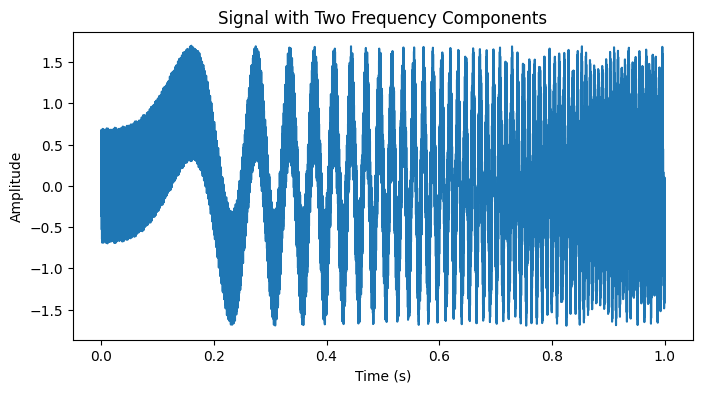

In [ ]:
duration = 1  # Duration of the signal (seconds)
fs = 25.6e3 # Sampling rate (Hz
t = np.linspace(0, duration, int(fs * duration))
f1=60*t**2
f2=60*7
f3=3e3
signal = np.sin(2 * np.pi * f1 * t) +0.2* np.sin(2 * np.pi * f2 * t)+0.5* np.sin(2 * np.pi * f3 * t)
plt.figure(figsize=(8, 4))
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with Two Frequency Components')
plt.show()

Choose a filter:
1. Low-Pass Filter
2. Bandpass Filter
Enter 1 or 2: 1
Enter the cutoff frequency for the low-pass filter: 60
Enter the filter's order: 12


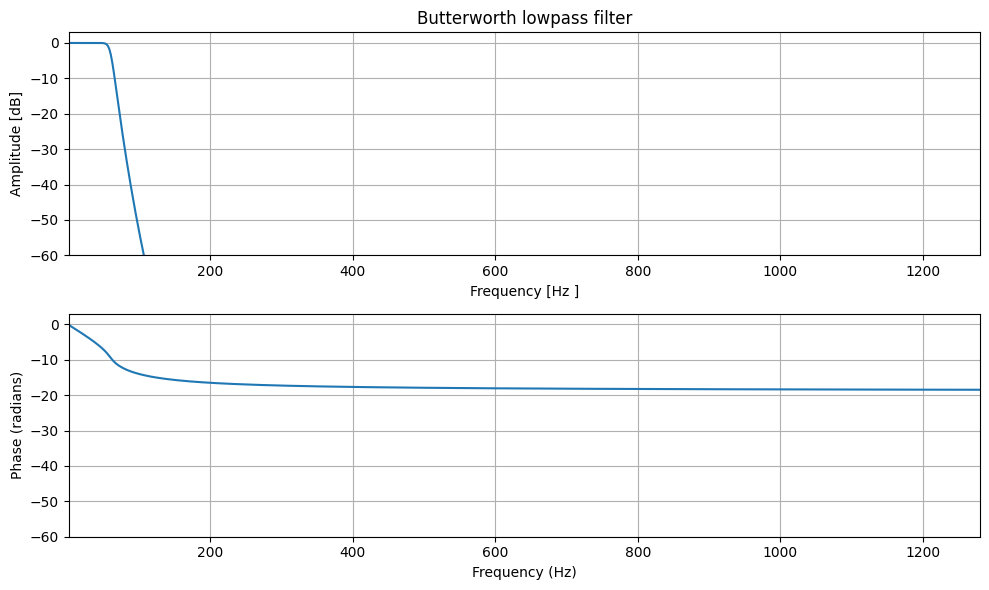

(array([1.12537009e-28]),
 array([1.00000000e+00, 3.59123324e-02, 6.44847809e-04, 7.62961506e-06,
        6.60829237e-08, 4.40670556e-10, 2.31759191e-12, 9.68270265e-15,
        3.19046784e-17, 8.09375979e-20, 1.50309861e-22, 1.83931630e-25,
        1.12537009e-28]))

In [11]:
design_and_apply_filter(25.6e3)

In [ ]:
sos=[b,a]